In [29]:
from database import get_items_list
import matplotlib.pyplot as plt
from fitter import Fitter, get_common_distributions, get_distributions

In [30]:
all_items = []

for n in range(1, 41):
    all_items.extend(get_items_list(n, 100, "").items)

items_with_prices = []

for item in all_items:
    if item.price_usd > 0:
        items_with_prices.append(item)

In [31]:
def wanted_items_by_usd(isUsd):
    def wanted_items(item):
        title = item.title.lower()
        desc = item.description.lower()
        text = title + " " + desc
        length = len(" ".join(set(text.split(" "))))
        if (item.deleted == False and
            item.usd == isUsd and
            "macbook"    in text and
            # "pro"        in text and
            # "air"        not in text and
            # "placa"      not in text and
            # "imac"       not in text and
            # "ipad"       not in text and
            # "phone"      not in text and
            # "repuesto"   not in text and
            item.price_usd != 111   and
            # item.price_usd != 222   and
            # item.price_usd != 333   and
            # item.price_usd != 444   and
            # item.price_usd != 555   and
            # item.price_usd != 666   and
            # item.price_usd != 777   and
            # item.price_usd != 888   and
            # item.price_usd != 999   and
            item.price_usd != 1111  and
            # item.price_usd != 2222  and
            # item.price_usd != 3333  and
            # item.price_usd != 4444  and
            length > 80 and
            item.price_usd >  200   and
            item.price_usd <  1400):
            return True
        return False
    return wanted_items

def filter_items(isUsd):
    filtered_items = filter(wanted_items_by_usd(isUsd), items_with_prices)
    filtered_items = sorted(filtered_items, key=lambda i: i.price_usd)
    # if isUsd:
    #     filtered_items *= 7 # times more items if it is USD
    return filtered_items

def calculate_prices_usd(isUsd):
    filtered_items = filter_items(isUsd)
    prices_usd = []
    
    for item in filtered_items:
        prices_usd.append(item.price_usd)
        # print(item.title.ljust(100), item.price_usd)
    
    return prices_usd

def get_urls(isUsd):
    filtered_items = filter_items(isUsd)
    urls = []
    
    for item in filtered_items:
        title = item.title.lower()
        desc = item.description.lower()
        text = title + " " + desc
        length = len(" ".join(set(text.split(" "))))
        urls.append((length, item.url))
        # print(item.title.ljust(100), item.price_usd)

    urls.sort(key=lambda i: i[0])
    
    return urls

def calculate_and_print_for(currency, bins):
    if currency == "USD":
        prices = calculate_prices_usd(True)
        count = len(prices)
        print("Count Items USD: ", count)
    elif currency == "ARS":
        prices = calculate_prices_usd(False)
        count = len(prices)
        print("Count Items ARS: ", count)
    elif currency == "ALL":
        prices = []
        prices += calculate_prices_usd(True)
        prices += calculate_prices_usd(False)
        count = len(prices)
        print("Count Items ALL: ", count)
    else:
        raise Exception(f"Unknown currency {currency}")
    counts, bins, bars = plt.hist(prices, bins)
    return (prices, (counts, bins, bars),)

def count_chars_in_text():
    chars = []
    for item in items_with_prices:
        title = item.title.lower()
        desc = item.description.lower()
        text = title + " " + desc
        # length = len(text)
        length = len(" ".join(set(text.split(" "))))
        #if length < 100:
        #    continue
        if length > 700:
            continue
        chars.append(length)
    return chars
    

Count Items USD:  1326


2024-09-17 10:41:26.152 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted norm distribution with error=2e-06)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,0.000002,295.377772,305.757616,0.084984,0.094383,9.886738e-11


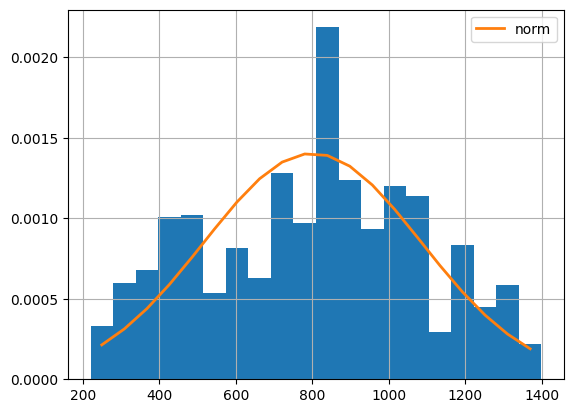

In [32]:
usd_bins = 20

items_usd, usd_hist = calculate_and_print_for("USD", usd_bins)

dists = ["norm"]

f = Fitter(items_usd,
           distributions = dists,
           bins = usd_bins)
f.fit()
f.summary()

Count Items ARS:  707


2024-09-17 10:41:28.541 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted lognorm distribution with error=6e-06)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,0.000006,452.917189,466.600281,0.202412,0.074632,0.000717


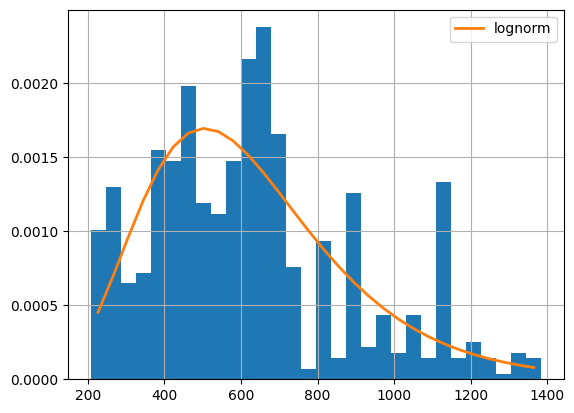

In [33]:
ars_bins = 30

items_ars, ars_hist = calculate_and_print_for("ARS", ars_bins)

dists = ["lognorm"]

f = Fitter(items_ars,
           distributions = dists,
           bins = ars_bins)
f.fit()
f.summary()

In [34]:
len(items_with_prices)

3921

2024-09-17 10:41:28.960 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted gamma distribution with error=3e-06)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,0.000003,431.269301,449.974587,0.027766,0.039764,0.000013


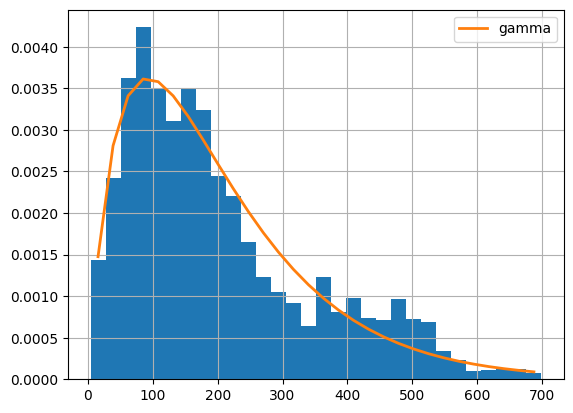

In [35]:
chars = count_chars_in_text()

usd_bins = 30

dists = ["gamma"]

f = Fitter(chars,
           distributions = dists,
           bins = usd_bins)
f.fit()
f.summary()